In [3]:
## Conectar com o google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
pip install -q tflite-model-maker

     |████████████████████████████████| 591 kB 5.4 MB/s 
     |████████████████████████████████| 103 kB 26.2 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 840 kB 31.6 MB/s 
     |████████████████████████████████| 6.3 MB 37.1 MB/s 
     |████████████████████████████████| 213 kB 45.1 MB/s 
     |████████████████████████████████| 1.1 MB 35.5 MB/s 
     |████████████████████████████████| 636 kB 33.7 MB/s 
     |████████████████████████████████| 120 kB 50.0 MB/s 
     |████████████████████████████████| 1.1 MB 49.8 MB/s 
     |████████████████████████████████| 1.2 MB 41.1 MB/s 
     |████████████████████████████████| 87 kB 899 kB/s 
     |████████████████████████████████| 352 kB 41.7 MB/s 
     |████████████████████████████████| 99 kB 9.4 MB/s 
     |████████████████████████████████| 37.1 MB 51 kB/s 
     |████████████████████████████████| 207 kB 49.7 MB/s 


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader
from tensorflow import keras




In [7]:
img = image.load_img("/content/drive/MyDrive/chest_xray/DataSet/treino/NORMAL/IM-0249-0001.jpeg")

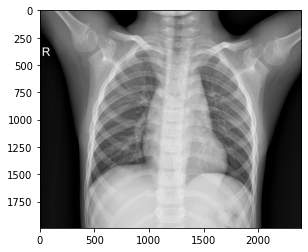

In [8]:
plt.imshow(img)

In [9]:
cv2.imread('/content/drive/MyDrive/chest_xray/DataSet/treino/NORMAL/IM-0249-0001.jpeg').shape

(1990, 2396, 3)

In [10]:

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [11]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/chest_xray/DataSet/treino',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = "binary")

validation_dataset  = train.flow_from_directory('/content/drive/MyDrive/chest_xray/DataSet/validação',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = "binary")

Found 2532 images belonging to 2 classes.
Found 166 images belonging to 2 classes.


In [ ]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [12]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation= 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation= 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation= 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Dropout(0.25),
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(512,activation = 'sigmoid')
                                    ])


In [ ]:
# Não roda com esse???
##model.compile(loss = 'binary_crossentropy',
 #             optimizer = RMSprop(learning_rate= 0.001),
  #            metrics = ['accuracy'])

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch =10,
                       epochs= 10,
                      validation_data = validation_dataset)

Epoch 1/10
10/10 [==============================] - 75s 5s/step - loss: 2.5711 - accuracy: 0.5333 - val_loss: 0.9857 - val_accuracy: 0.4940
Epoch 2/10
10/10 [==============================] - 9s 908ms/step - loss: 0.7991 - accuracy: 0.6000 - val_loss: 0.8020 - val_accuracy: 0.5060
Epoch 3/10
10/10 [==============================] - 10s 983ms/step - loss: 0.6893 - accuracy: 0.5000 - val_loss: 0.7796 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 11s 1s/step - loss: 0.7156 - accuracy: 0.5000 - val_loss: 1.0716 - val_accuracy: 0.4940
Epoch 5/10
10/10 [==============================] - 13s 1s/step - loss: 0.9288 - accuracy: 0.4333 - val_loss: 0.6679 - val_accuracy: 0.6446
Epoch 6/10
10/10 [==============================] - 12s 1s/step - loss: 0.5972 - accuracy: 0.6667 - val_loss: 0.5324 - val_accuracy: 0.7831
Epoch 7/10
10/10 [==============================] - 10s 959ms/step - loss: 0.2407 - accuracy: 0.9667 - val_loss: 0.5073 - val_accuracy: 0.7771
Epoch 8/10
1

In [23]:
model.fit(train_dataset, validation_data=validation_dataset,  epochs=2)

Epoch 1/2
844/844 [==============================] - 539s 638ms/step - loss: 0.2321 - accuracy: 0.9139 - val_loss: 0.1616 - val_accuracy: 0.9217
Epoch 2/2
844/844 [==============================] - 53s 62ms/step - loss: 0.1363 - accuracy: 0.9510 - val_loss: 0.2853 - val_accuracy: 0.9096


In [ ]:
predictions = model.predict(test_images_fit)